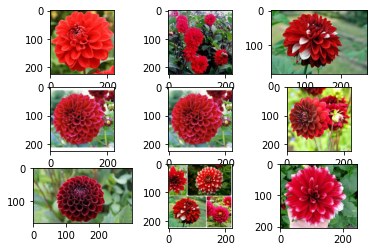

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/dulieu/hoa/hoathuocluoc/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'hoathuocluoc'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [5]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder1= '/content/drive/MyDrive/dulieu/hoa/hoacuc/'
folder2= '/content/drive/MyDrive/dulieu/hoa/hoahuongduong/'
folder3= '/content/drive/MyDrive/dulieu/hoa/hoathuocluoc/'
folder4= '/content/drive/MyDrive/dulieu/hoa/hoavantho/'
photos, labels = list(), list()
for file in listdir(folder1):
  if file.startswith('hoacuc'):
    output = 0
    photo = load_img(folder1+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder2):
  if file.startswith('hoahuongduong'):
    output = 1
    photo = load_img(folder2+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder3):
  if file.startswith('hoathuocduoc'):
    output = 2
    photo = load_img(folder3+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder4):
  if file.startswith('hoavantho'):
    output = 3
    photo = load_img(folder4+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10TraiCay_photos.npy', photos)
save('10TraiCay_labels.npy', labels)

(60, 200, 200, 3) (60,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 13s 616ms/step - loss: 2968.8999 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 89ms/step - loss: 4385.2729 - accuracy: 0.3333
Epoch 3/50
2/2 [==============================] - 0s 85ms/step - loss: 1226.6259 - accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 0s 84ms/step - loss: 593.9257 - accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 0s 86ms/step - loss: 141.9243 - accuracy: 0.4500
Epoch 6/50
2/2 [==============================] - 0s 82ms/step - loss: 114.6367 - accuracy: 0.5833
Epoch 7/50
2/2 [==============================] - 0s 83ms/step - loss: 47.9702 - accuracy: 0.7000
Epoch 8/50
2/2 [==============================] - 0s 86ms/step - loss: 2.6832 - accuracy: 0.9333
Epoch 9/50
2/2 [==============================] - 0s 83ms/step - loss: 5.7354 - accuracy: 0.8667
Epoch 10/50
2/2 [==============================] - 0s 82ms/step - loss: 3.2157 - accuracy: 0.9333
Epoch 1

In [8]:
model.evaluate(photos,labels)

2/2 [==============================] - 0s 46ms/step - loss: 5.9605e-09 - accuracy: 1.0000


[5.960463678178485e-09, 1.0]

In [9]:
model.save('4loaihoa_Final.h5')

In [10]:
from keras.models import load_model
models=load_model('4loaihoa_Final.h5')

In [11]:
classes = ["hoacuc","hoahuongduong","hoathuocluoc","hoavantho"]

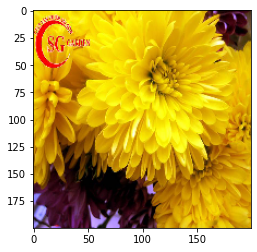

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/dulieu/hoa/a.bmp', target_size=(200,200))
plt.imshow(img)

In [16]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.2479131  0.3358625  0.02099095 0.22355855 0.04339814 0.00529318
  0.04882619 0.02365801 0.00578239 0.04471703]]


'hoahuongduong'